# Digit Recognition with ML | El Yazısı Rakam Tanıma

## Giriş | Introduction

Bu projede el yazısı rakam görüntülerini sınıflandıran bir makine öğrenmesi modeli geliştirilmiştir. Amaç, piksel verilerini kullanarak doğru rakam tahmini yapmaktır.

Proje Kaggle Digit Recognizer yarışması kapsamında gerçekleştirilmiştir.

## Veri Tanımı | Dataset Description

Veri seti 28x28 piksel gri tonlamalı el yazısı rakam görüntülerinden oluşmaktadır.

Her satır bir görüntüyü temsil eder:
- 784 piksel değeri
- hedef: 0–9 arası rakam etiketi

Bu problem çok sınıflı sınıflandırma problemidir.

## Workflow

Data Loading → EDA → Model → Prediction → Submission


In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis | Keşifsel Veri Analizi

### Digit Distribution | Rakam Dağılımı


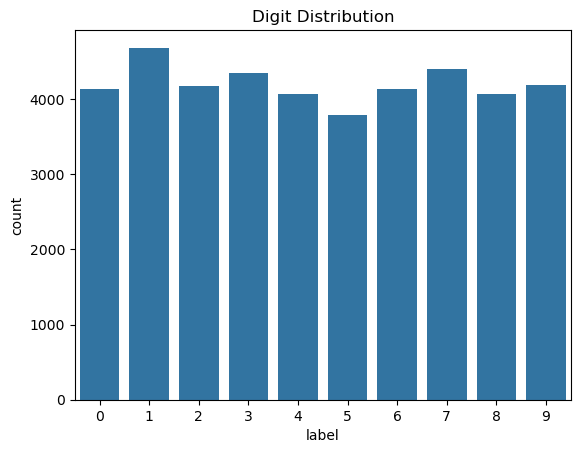

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Digit Distribution")
plt.show()


### Sample Images | Örnek Görüntüler

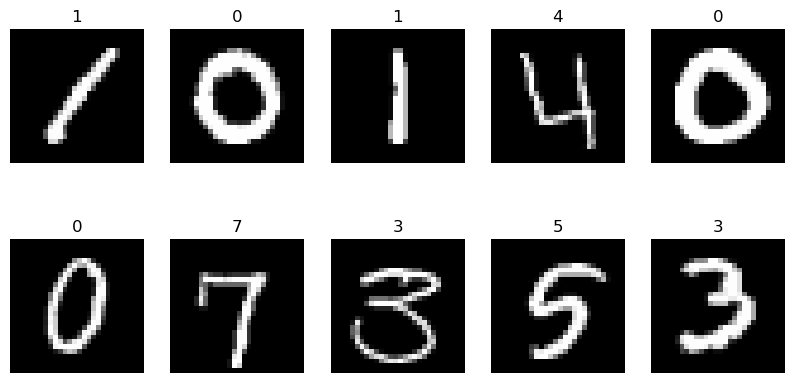

In [4]:
import numpy as np

fig, axes = plt.subplots(2,5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    img = X.iloc[i].values.reshape(28,28)
    ax.imshow(img, cmap="gray")
    ax.set_title(y.iloc[i])
    ax.axis("off")

plt.show()


## Data Preparation | Veri Hazırlama


In [2]:
X = train.drop(columns=["label"])
y = train["label"]


## Model Training | Model Eğitimi

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

print("model hazır ✔")


model hazır ✔


### Prediction

In [6]:
pred = model.predict(test)

### Kaggle Submission

In [7]:
submission = pd.read_csv("sample_submission.csv")
submission["Label"] = pred

submission.to_csv("submission.csv", index=False)

print("submission hazır 🎯")

submission hazır 🎯


## Conclusion | Sonuç

Bu projede el yazısı rakam görüntülerini sınıflandıran bir makine öğrenmesi modeli geliştirilmiştir. Veri analizi, model eğitimi ve Kaggle submission süreci başarıyla tamamlanmıştır.

Çalışma, görüntü tabanlı çok sınıflı sınıflandırma problemlerinde temel bir makine öğrenmesi pipeline’ının nasıl kurulacağını göstermektedir.


### Model Saving | Model Kaydetme

In [8]:
import joblib

joblib.dump(model, "digit_model.pkl")
print("model kaydedildi ✔")

model kaydedildi ✔
